In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
nsample = 30
x = np.linspace(0,10,nsample)
x

array([ 0.        ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])

一元线性回归

In [3]:
X = sm.add_constant(x)
X

array([[ 1.        ,  0.        ],
       [ 1.        ,  0.34482759],
       [ 1.        ,  0.68965517],
       [ 1.        ,  1.03448276],
       [ 1.        ,  1.37931034],
       [ 1.        ,  1.72413793],
       [ 1.        ,  2.06896552],
       [ 1.        ,  2.4137931 ],
       [ 1.        ,  2.75862069],
       [ 1.        ,  3.10344828],
       [ 1.        ,  3.44827586],
       [ 1.        ,  3.79310345],
       [ 1.        ,  4.13793103],
       [ 1.        ,  4.48275862],
       [ 1.        ,  4.82758621],
       [ 1.        ,  5.17241379],
       [ 1.        ,  5.51724138],
       [ 1.        ,  5.86206897],
       [ 1.        ,  6.20689655],
       [ 1.        ,  6.55172414],
       [ 1.        ,  6.89655172],
       [ 1.        ,  7.24137931],
       [ 1.        ,  7.5862069 ],
       [ 1.        ,  7.93103448],
       [ 1.        ,  8.27586207],
       [ 1.        ,  8.62068966],
       [ 1.        ,  8.96551724],
       [ 1.        ,  9.31034483],
       [ 1.        ,

In [4]:
beta = np.array([2,5])
beta

array([2, 5])

In [5]:
e = np.random.normal(size=nsample)
e

array([-0.15750622, -0.85968786, -0.17346878, -0.61971367,  0.9054719 ,
       -0.41382565, -1.47277654, -0.10179437,  1.43716666, -0.55171868,
       -0.4386702 ,  0.78607138,  0.54407401, -0.77857974, -0.18169763,
       -0.1228189 ,  0.57916552,  0.17530205,  1.39639572, -0.80352578,
       -0.65906595,  2.20537495, -0.68168424,  0.21441411,  1.14273512,
        0.87270136, -0.54090441,  0.98418536,  0.42875823,  1.15290262])

In [6]:
y = np.dot(X, beta) + e
y

array([ 1.84249378,  2.86445007,  5.27480708,  6.55270012,  9.80202362,
       10.206864  , 10.87205105, 13.96717115, 17.23027011, 16.96552269,
       18.80270911, 21.75158862, 23.23372919, 23.63521336, 25.9562334 ,
       27.73925007, 30.16537241, 31.48564688, 34.43087848, 33.95509491,
       35.82369267, 40.4122715 , 39.24935025, 41.86958652, 44.52204546,
       45.97614964, 46.2866818 , 49.5359095 , 50.7046203 , 53.15290262])

In [7]:
# 最小二乘法
model = sm.OLS(y,X)

In [8]:
#拟合数据
res = model.fit()

In [9]:
#回归系数
res.params

array([1.61160737, 5.10612706])

In [10]:
#全部结果
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.056e+04
Date:                Mon, 26 Aug 2024   Prob (F-statistic):           1.22e-37
Time:                        14:32:42   Log-Likelihood:                -35.296
No. Observations:                  30   AIC:                             74.59
Df Residuals:                      28   BIC:                             77.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6116      0.289      5.570      0.000       1.019       2.204
x1             5.1061      0.050    102.764      0.000       5.004       5.208
==============================================================================
Omnibus:                        0.925   Durbin-Watson:                   2.632
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.876
Skew:                           0.372   Prob(JB):                        0.645
Kurtosis:                       2.618   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
y_ = res.fittedvalues
y_

array([ 1.61160737,  3.37234084,  5.13307431,  6.89380778,  8.65454125,
       10.41527472, 12.17600819, 13.93674166, 15.69747513, 17.4582086 ,
       19.21894207, 20.97967553, 22.740409  , 24.50114247, 26.26187594,
       28.02260941, 29.78334288, 31.54407635, 33.30480982, 35.06554329,
       36.82627676, 38.58701023, 40.3477437 , 42.10847717, 43.86921064,
       45.62994411, 47.39067758, 49.15141105, 50.91214452, 52.67287799])

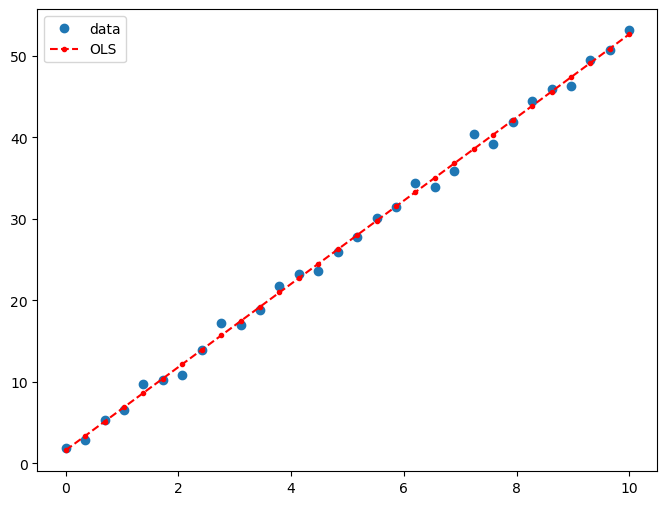

In [12]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x,y,'o',label='data')
ax.plot(x,y_,'r--.',label='OLS')
ax.legend(loc='best')
plt.show()

高阶回归

In [13]:
#Y=5+2⋅X+3⋅X^2

nsample = 50
x = np.linspace(0,10,nsample)
X = np.column_stack((x,x**2))
X = sm.add_constant(X)

In [14]:
beta = np.array([5,2,3])
e = np.random.normal(size=nsample)
y = np.dot(X,beta) + e
model = sm.OLS(y,X)
res = model.fit()
res.params

array([5.11796058, 1.88384386, 3.00903544])

In [17]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.387e+05
Date:                Mon, 26 Aug 2024   Prob (F-statistic):           6.92e-95
Time:                        14:37:24   Log-Likelihood:                -69.042
No. Observations:                  50   AIC:                             144.1
Df Residuals:                      47   BIC:                             149.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1180      0.405     12.639      0.000       4.303       5.933
x1             1.8838      0.187     10.059      0.000       1.507       2.261
x2             3.0090      0.018    166.148      0.000       2.973       3.045
==============================================================================
Omnibus:                        0.135   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.934   Jarque-Bera (JB):                0.045
Skew:                          -0.065   Prob(JB):                        0.978
Kurtosis:                       2.930   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

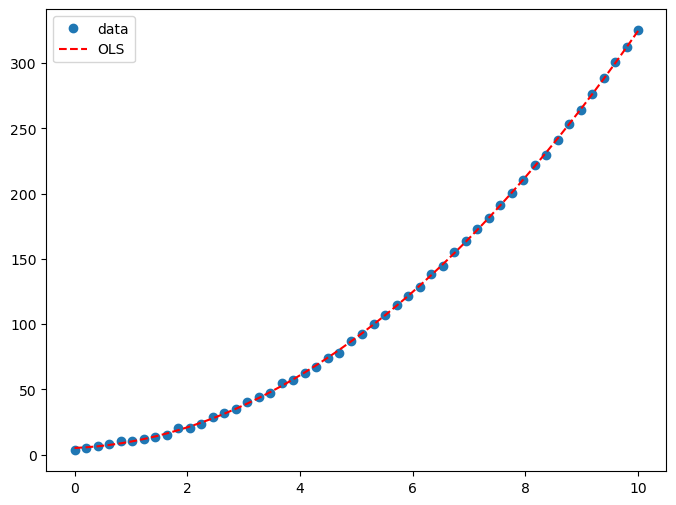

In [18]:
y_ = res.fittedvalues
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label='data')
ax.plot(x, y_,'r--',label='OLS')
ax.legend(loc='best')
plt.show()

分类变量

In [19]:
nsample = 50
groups = np.zeros(nsample, int)
groups

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [20]:
groups[20:40] = 1
groups[40:] = 2
dummy = sm.categorical(groups, drop=True)
dummy

E:\Anaconda3\lib\site-packages\statsmodels\tools\tools.py:152: FutureWarning: categorical is deprecated. Use pandas Categorical to represent categorical data and can get_dummies to construct dummy arrays. It will be removed after release 0.13.
  warnings.warn(


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0

In [21]:
#Y=5+2X+3Z1+6⋅Z2+9⋅Z3.

x = np.linspace(0,20,nsample)
X = np.column_stack((x,dummy))
X = sm.add_constant(X)
beta = [5,2,3,6,9]
e = np.random.normal(size=nsample)
y = np.dot(X,beta) + e
res = sm.OLS(y,X).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     2540.
Date:                Mon, 26 Aug 2024   Prob (F-statistic):           4.33e-51
Time:                        14:47:42   Log-Likelihood:                -75.379
No. Observations:                  50   AIC:                             158.8
Df Residuals:                      46   BIC:                             166.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5382      0.645     13.228      0.000       7.239       9.837
x1             1.9828      0.074     26.699      0.000       1.833       2.132
x2            -0.5433      0.409     -1.327      0.191      -1.367       0.281
x3             2.8192      0.342      8.241      0.000       2.131       3.508
x4             6.2622      0.771      8.126      0.000       4.711       7.814
==============================================================================
Omnibus:                        1.206   Durbin-Watson:                   2.185
Prob(Omnibus):                  0.547   Jarque-Bera (JB):                1.184
Skew:                           0.345   Prob(JB):                        0.553
Kurtosis:                       2.695   Cond. No.                     3.77e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.78e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

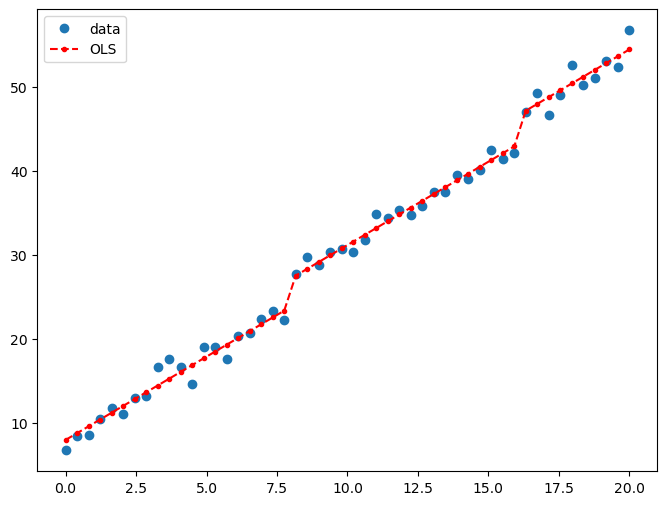

In [23]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x,y,'o',label='data')
ax.plot(x,res.fittedvalues, 'r--.', label='OLS')
ax.legend(loc='best')
plt.show()